# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Your answer here`: чтобы результаты экспериментов были воспроизводимыми

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
## Пропуски есть

pd.concat([df_train, df_test]).isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
## Явные дубликаты есть, уберем их

print(df_train.drop_duplicates().shape[0] / df_train.shape[0])
print(df_test.drop_duplicates().shape[0] / df_test.shape[0])

0.8592656093727675
0.938


In [5]:
pip install ydata-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.2 MB/s eta 0:00:00


In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [8]:
print('Статистики числовых признаков в тренировочных данных:')
df_train.describe()

Статистики числовых признаков в тренировочных данных:


year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [9]:
print('Статистики числовых признаков в тестовых данных:')
df_test.describe()

Статистики числовых признаков в тестовых данных:


year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [10]:
print('Статистики категориальных признаков в тренировочных данных:')
df_train.describe(include='object')

Статистики категориальных признаков в тренировочных данных:


name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [11]:
print('Статистики категориальных признаков в тестовых данных:')
df_test.describe(include='object')

Статистики категориальных признаков в тестовых данных:


name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [12]:
## Средние практически не отличаются
stats_mean = pd.concat([
    df_train.mean(numeric_only=True),
    df_test.mean(numeric_only=True)], axis=1)
stats_mean.columns = ['train', 'test']
stats_mean

train           test
year             2013.818403    2013.681000
selling_price  639515.197171  617901.042000
km_driven       69584.615517   71393.341000
seats               5.419008       5.410805

In [13]:
## Медианы также практически не отличаются. Это говорит о том, что данные на трейн и тест разделены корректно --
## Закономерности данных сохранены
stats_median = pd.concat([
    df_train.median(numeric_only=True),
    df_test.median(numeric_only=True)], axis=1)
stats_median.columns = ['train', 'test']
stats_median

train      test
year             2015.0    2014.0
selling_price  450000.0  434999.0
km_driven       60000.0   61500.0
seats               5.0       5.0

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [14]:
## Всего 1159 дубликатов
df_train.drop(columns=['selling_price']).duplicated().values.sum()

1159

In [15]:
## Записи-дубликаты
df_train[df_train.drop(columns=['selling_price']).duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [16]:
df_train = df_train[~df_train.drop(columns=['selling_price']).duplicated(keep='first')].copy()

In [17]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [18]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].apply(
    lambda x: x.split()[0] if isinstance(x, str) else x
    ))

In [19]:
df_test['mileage'] = pd.to_numeric(df_test['mileage'].apply(
    lambda x: x.split()[0] if isinstance(x, str) else x
    ))

In [20]:
df_train['engine'] = pd.to_numeric(df_train['engine'].apply(
    lambda x: x.split()[0] if isinstance(x, str) else x
    ))
df_test['engine'] = pd.to_numeric(df_test['engine'].apply(
    lambda x: x.split()[0] if isinstance(x, str) else x
    ))

In [21]:
df_train['max_power'] = pd.to_numeric(df_train['max_power'].apply(
    lambda x: np.nan if x == ' bhp' else x.split()[0] if isinstance(x, str) else x
    ))

In [22]:
df_test['max_power'] = pd.to_numeric(df_test['max_power'].apply(
    lambda x: np.nan if x == ' bhp' else x.split()[0] if isinstance(x, str) else x
    ))

In [23]:
import re

In [24]:
df_train['torque'] = df_train['torque'].apply(
    lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[0])\
    if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
    )
df_train['max_torque_rpm'] = df_train['torque'].apply(
    lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[-1])\
    if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
    )

In [25]:
df_test['torque'] = df_test['torque'].apply(
    lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[0])\
    if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
    )
df_test['max_torque_rpm'] = df_test['torque'].apply(
    lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[-1])\
    if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
    )

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [26]:
num_cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']

In [27]:
fillna_dict = {col: df_train[col].median() for col in num_cols}
df_train = df_train.fillna(fillna_dict)
df_test = df_test.fillna(fillna_dict)

`1) Медиану стоит применять для избежания смещений в данных, в частности для устойчивости от выбросов
2) Заполнять пропуски надо тренировочными значениями, так как в реальной жизни тестовой выборки у нас не будет в момент обучения модели`

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [28]:
df_train['engine'] = df_train['engine'].dropna().astype(int)
df_train['seats'] = df_train['seats'].dropna().astype(int)
df_test['engine'] = df_test['engine'].dropna().astype(int)
df_test['seats'] = df_test['seats'].dropna().astype(int)

In [29]:
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())

In [30]:
df_train['seats'].value_counts()

seats
5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: count, dtype: int64

In [31]:
df_test['seats'].value_counts()

seats
5.0    777
7.0    161
4.0     24
8.0     23
6.0      8
9.0      7
Name: count, dtype: int64

`Your answer here`: Если посмотреть на количество уникальных значений переменной seats, то можно заметить, что а) их не так много, б) они все целочисленные, что логично, в) не получится интерпретировать среднее дробное значение, так как оно не имеет смысла. Соответственно, эту переменную можно расценивать как категориальную.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [32]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   161.308971     5.426712      161.308971  
std      31.640418    91.175319     0.982344       91.175319  
min       0.000000     2.500000     2.000000        2.500000  
25%      68.000000    99.040000     5.000000       99.040000  
50%      81.860000   150.000000     5.000000      150.000000  
75%      99.000000   200.000000     5.000000      200.000000  
max     400.000000   789.000000    14.000000      789.000000

In [33]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   165.711010     5.403000      165.711010  
std      34.893389    95.142648     0.912921       95.142648  
min      34.200000     6.100000     4.000000        6.100000  
25%      69.000000    99.040000     5.000000       99.040000  
50%      82.425000   150.000000     5.000000      150.000000  
75%     102.000000   200.500000     5.000000      200.500000  
max     280.000000   620.000000     9.000000      620.000000

`Your answer here`: нет оснований полагать, так как мы заполняли все пропуски медианами. Также пропусков было не так много, поэтому мы только получили некоторое увеличение значение в медиане

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [34]:
import seaborn as sns

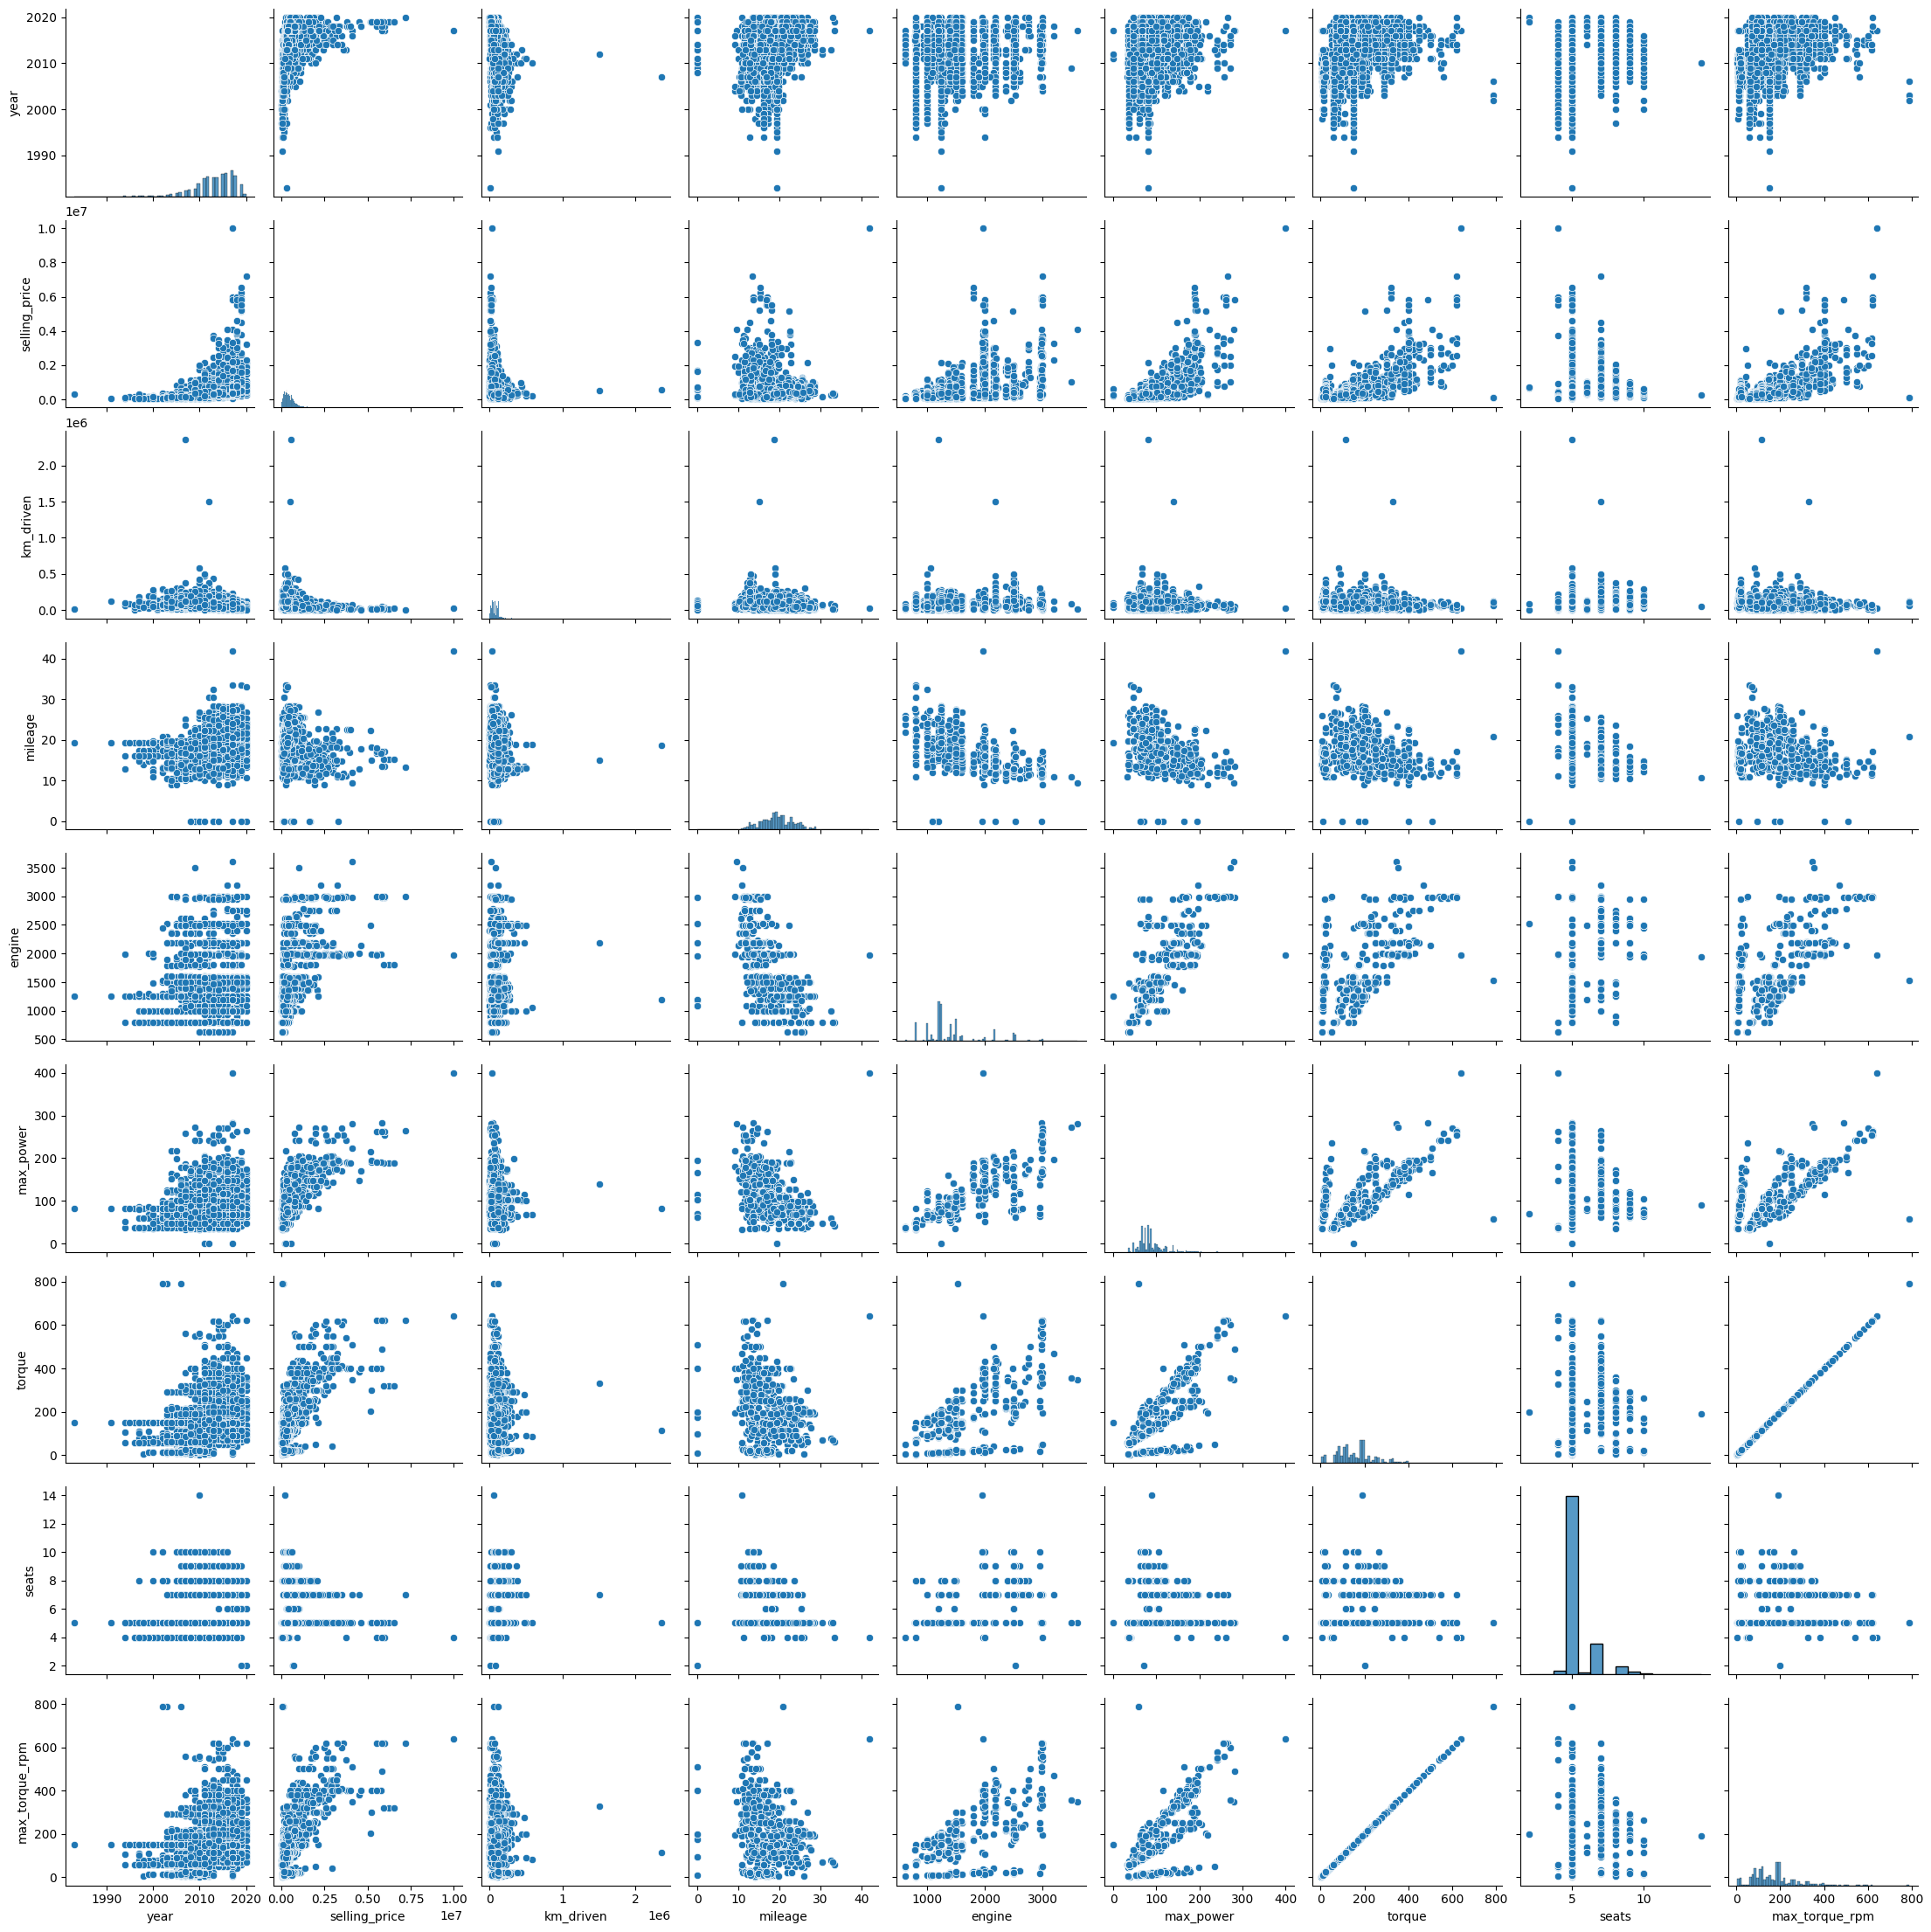

In [35]:
sns.pairplot(df_train)

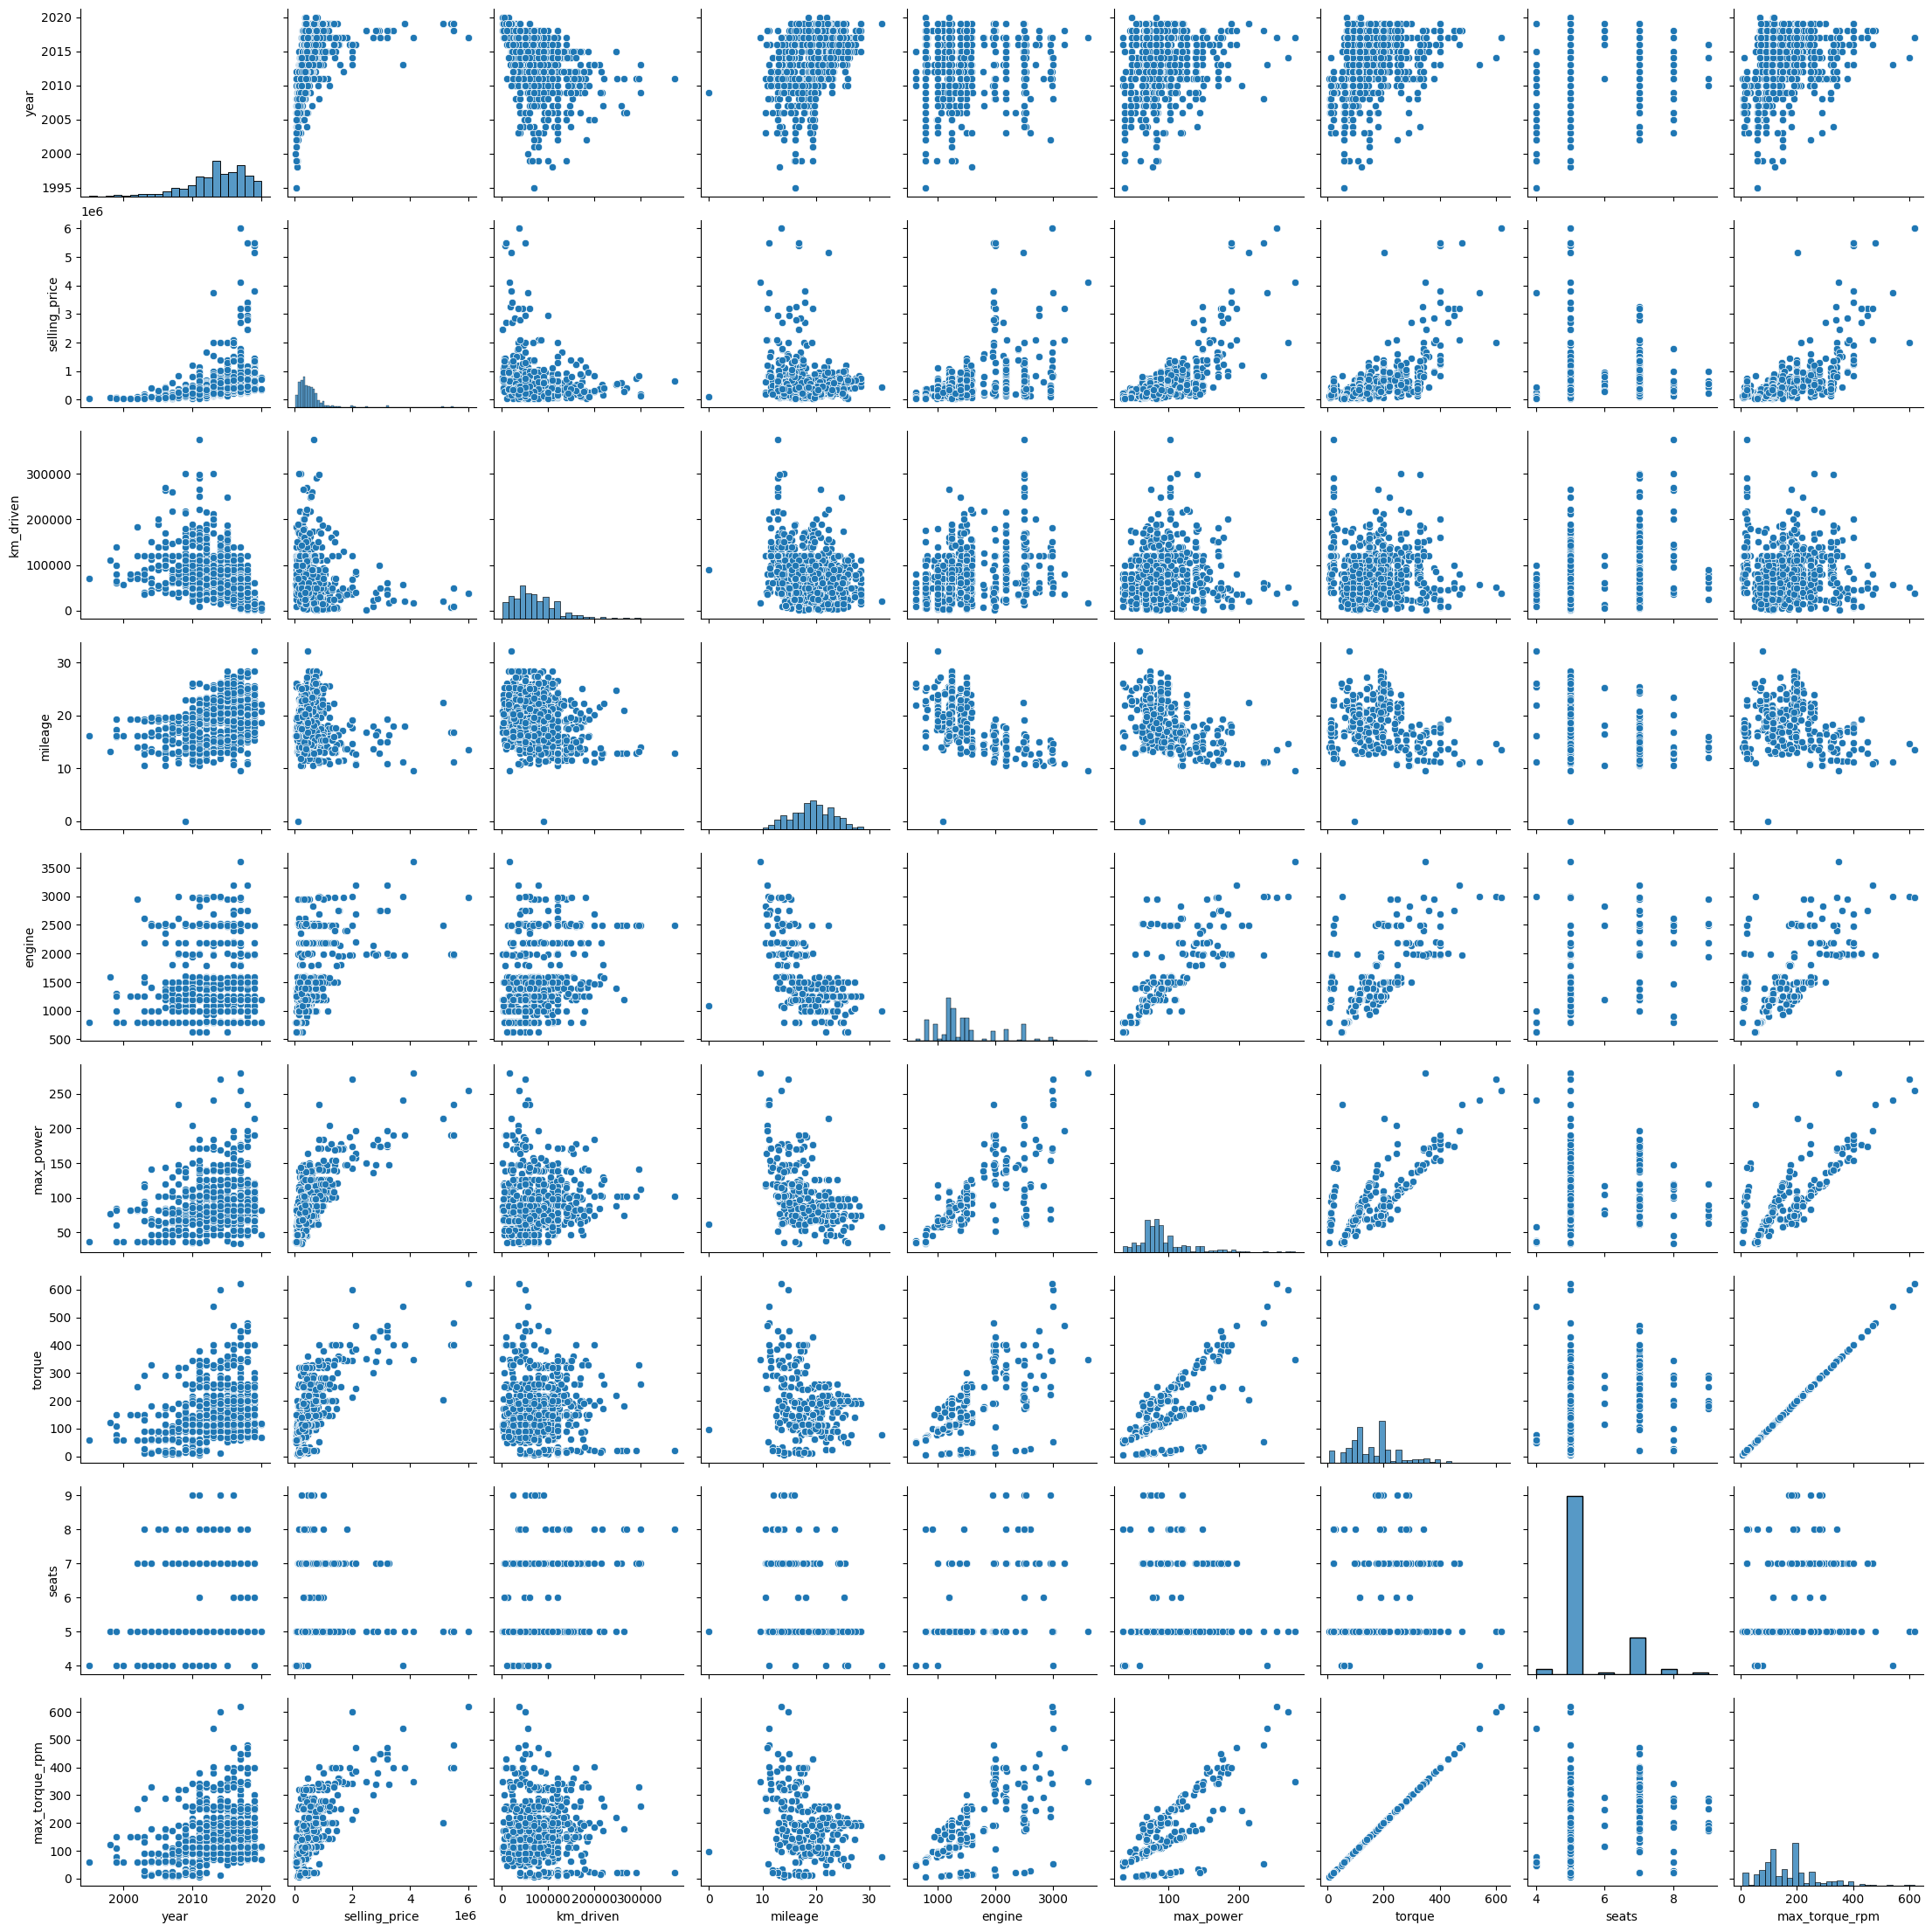

In [36]:
sns.pairplot(df_test)

`Your answer`:
Шаг 1: да, по данным можно сделать предположение о связи переменных с целевой; также можно предположить и значение корреляции -- в случае пирсона или спирмена оценивается линейная взаимосвязь признаков, поэтому чем меньше будет похоже распределение точек на линию, тем меньше будет корреляция. Например, совместное распределение целевой переменной и переменной mileage выглядит похожим на шар, что говорит о низком уровне корреляции

Шаг 2: Да, распределения очень похожи, что говорит о хорошем разделении данных на трейн и тест

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [37]:
df_train.corr(numeric_only=True)

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque          0.250073       0.613396   0.039359 -0.132404  0.612569   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.250073       0.613396   0.039359 -0.132404  0.612569   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.250073  0.041178        0.250073  
selling_price    0.692814  0.613396  0.149953        0.613396  
km_driven        0.024588  0.039359  0.192328        0.039359  
mileage         -0.373390 -0.132404 -0.451059       -0.132404  
engine           0.681117  0.612569  0.652172        0.612569  
max_power        1.000000  0.744654  0.244112        0.744654  
torque           0.744654  1.000000  0.310590        1.000000  
seats            0.244112  0.310590  1.000000        0.310590  
max_torque_rpm   0.744654  1.000000  0.310590        1.000000

<Axes: >

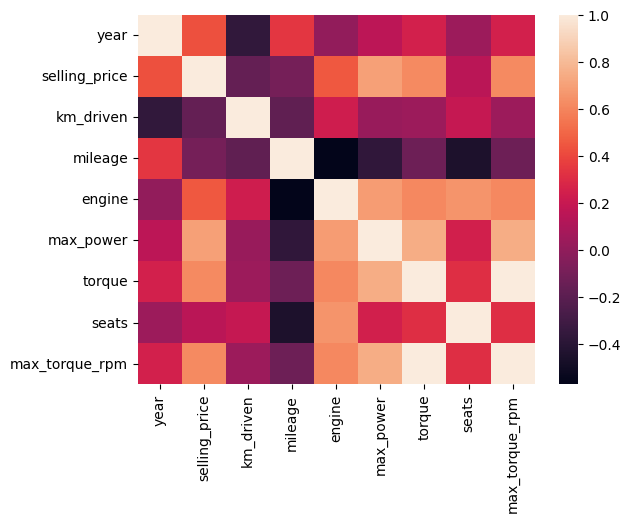

In [38]:
sns.heatmap(df_train.corr(numeric_only=True))

<Axes: >

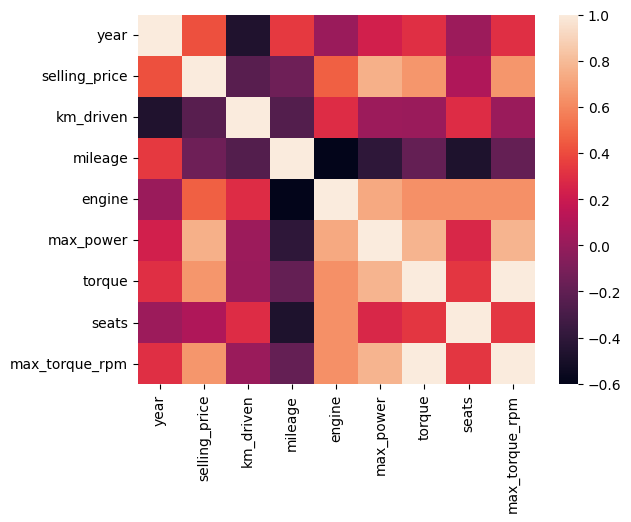

In [39]:
sns.heatmap(df_test.corr(numeric_only=True))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`:
1) наименее скоррелированы между собой по модулю признаки engine и year
2) сильная положительная связь, например, у признаков torque и max_torque_rpm
3) нет, так как связь этих переменных положительная: чем меньше год, тем меньше километров проехала машина к дате продажи

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [40]:
def get_spearman(x, y):
    index_x, index_y = np.argsort(x) + 1, np.argsort(y) + 1
    print(index_x, index_y)
    index_dif = np.sum(np.square(index_x - index_y))

    spear_coef = 1 - 6 * index_dif / x.shape[0] / (np.square(x.shape[0]) - 1)
    return spear_coef

In [41]:
x = np.array([1, 2, 12, 4, 6, 10])
y = np.array([10, 15, 8, 16, 19, 1])

In [42]:
pip install phik -q

In [43]:
import phik

In [44]:
df_train[num_cols].phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']


year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.219841   0.081574  0.279253  0.213156   
selling_price   0.219841       1.000000   0.000000  0.649768  0.503682   
km_driven       0.081574       0.000000   1.000000  0.081625  0.210747   
mileage         0.279253       0.649768   0.081625  1.000000  0.588155   
engine          0.213156       0.503682   0.210747  0.588155  1.000000   
max_power       0.381639       0.872166   0.000000  0.687235  0.720780   
torque          0.322399       0.751469   0.069287  0.721306  0.882154   
max_torque_rpm  0.322399       0.751469   0.069287  0.721306  0.882154   

                max_power    torque  max_torque_rpm  
year             0.381639  0.322399        0.322399  
selling_price    0.872166  0.751469        0.751469  
km_driven        0.000000  0.069287        0.069287  
mileage          0.687235  0.721306        0.721306  
engine           0.720780  0.882154        0.882154  
max_power        1.000000  0.860905        0.860905  
torque           0.860905  1.000000        1.000000  
max_torque_rpm   0.860905  1.000000        1.000000

In [45]:
df_test[num_cols].phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']


year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.386653   0.428043  0.306465  0.297868   
selling_price   0.386653       1.000000   0.301341  0.544609  0.640607   
km_driven       0.428043       0.301341   1.000000  0.401645  0.341443   
mileage         0.306465       0.544609   0.401645  1.000000  0.747442   
engine          0.297868       0.640607   0.341443  0.747442  1.000000   
max_power       0.289052       0.784914   0.169319  0.589976  0.930724   
torque          0.534506       0.686955   0.259368  0.446850  0.908314   
max_torque_rpm  0.534506       0.686955   0.259368  0.446850  0.908314   

                max_power    torque  max_torque_rpm  
year             0.289052  0.534506        0.534506  
selling_price    0.784914  0.686955        0.686955  
km_driven        0.169319  0.259368        0.259368  
mileage          0.589976  0.446850        0.446850  
engine           0.930724  0.908314        0.908314  
max_power        1.000000  0.933097        0.933097  
torque           0.933097  1.000000        1.000000  
max_torque_rpm   0.933097  1.000000        1.000000

`Your answer here`: корреляции km_driven и mileage с целевой переменной стали положительные + многие корреляции скорректировали свои значения и стали выше

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [46]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [47]:
df_num_train = df_train[num_cols + ['seats']].copy()
df_num_test = df_test[num_cols + ['seats']].copy()

y_train = df_num_train['selling_price']
X_train = df_num_train.drop(columns=['selling_price'])

In [48]:
## Закомментил ассерт и оставил все числовые признаки

# assert X_train.shape == (5840, 6)

In [49]:
y_test = df_num_test['selling_price']
X_test = df_num_test.drop(columns=['selling_price'])

In [50]:
# assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
mse_train = MSE(y_train, model.predict(X_train))
mse_test = MSE(y_test, model.predict(X_test))

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

In [53]:
print(f'Метрика MSE на трейне: {mse_train}, метрика R2 на трейне: {r2_train}')
print(f'Метрика MSE на тесте: {mse_test}, метрика R2 на тесте: {r2_test}')

Метрика MSE на трейне: 115084858723.86366, метрика R2 на трейне: 0.5985015145455779
Метрика MSE на тесте: 230514594097.48013, метрика R2 на тесте: 0.5989854856089141


`Your answer`: модель не переобучилась, однако метрики оставляют желать лучшего. R2 достаточно низкий как для трейна, так и для теста

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [54]:
def r2(reals, preds):
    up_value = np.sum(np.square(reals - preds))
    down_value = np.sum(np.square(reals - np.mean(reals)))

    return 1 - up_value / down_value

In [55]:
## Значение метрики получилось такое же

r2(y_train, model.predict(X_train))

0.5985015145455779

`Your answer here`: числитель обозначает сумму квадратов разностей, знаменатель -- сумму квадратов отклонений от среднего, то есть дисперсию. По сути метрика отражает долю объясненной дисперсии

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [56]:
def adj_r2(reals, preds, n_features):
    up_value = np.sum(np.square(reals - preds))
    down_value = np.sum(np.square(reals - np.mean(reals)))
    mid_value = (reals.shape[0] - 1) / (reals.shape[0] - n_features - 1)
    adj_r2_value = 1 - (1 - up_value / down_value) * mid_value

    return adj_r2_value

`Your answer here`: adjusted-r2 необходим в случае большого числа предикторов, так как в таком случае так или иначе значение обычного r2 будет всегда повышаться; соответственно, нужна нормировка с учетом количества признаков

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [57]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
mse_train = MSE(y_train, model.predict(X_train))
mse_test = MSE(y_test, model.predict(X_test))

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

In [60]:
print(f'Метрика MSE на трейне: {mse_train}, метрика R2 на трейне: {r2_train}')
print(f'Метрика MSE на тесте: {mse_test}, метрика R2 на тесте: {r2_test}')

Метрика MSE на трейне: 115084858723.86314, метрика R2 на трейне: 0.5985015145455796
Метрика MSE на тесте: 230514594097.4783, метрика R2 на тесте: 0.5989854856089172


In [61]:
feature_imp = list([*zip(model.coef_, df_num_train.drop(columns=['selling_price']).columns)])
sorted(feature_imp, key=lambda x: x[0])

[(-44942.04880738612, 'km_driven'),
 (-30285.376978479617, 'seats'),
 (7703.0382845793065, 'mileage'),
 (35632.649028341206, 'max_torque_rpm'),
 (35632.649028341235, 'torque'),
 (40651.28521664516, 'engine'),
 (149231.5762465575, 'year'),
 (278132.78776866716, 'max_power')]

`Your answer`: наиболее информативным оказался признак пробега -- сколько километров было проехано на этой машине

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [62]:
from sklearn.linear_model import Lasso

In [63]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [64]:
mse_train = MSE(y_train, model.predict(X_train))
mse_test = MSE(y_test, model.predict(X_test))

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

In [65]:
print(f'Метрика MSE на трейне: {mse_train}, метрика R2 на трейне: {r2_train}')
print(f'Метрика MSE на тесте: {mse_test}, метрика R2 на тесте: {r2_test}')

Метрика MSE на трейне: 115084858733.10867, метрика R2 на трейне: 0.5985015145133246
Метрика MSE на тесте: 230515271761.40518, метрика R2 на тесте: 0.5989843067114524


In [66]:
feature_imp = list([*zip(model.coef_, df_num_train.drop(columns=['selling_price']).columns)])
sorted(feature_imp, key=lambda x: x[0])

[(-44940.97680500047, 'km_driven'),
 (-30282.71485461235, 'seats'),
 (0.0, 'max_torque_rpm'),
 (7701.083848721479, 'mileage'),
 (40646.72569620796, 'engine'),
 (71265.72524396921, 'torque'),
 (149231.3914611241, 'year'),
 (278133.19191151764, 'max_power')]

Модель занулила max_torque_rpm, так как он очень сильно коррелирует с torque

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
model_grid = GridSearchCV(Lasso(), {'alpha': np.arange(0.01, 1, 0.01)}, cv=10)

In [69]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])})

In [70]:
model = Lasso(**model_grid.best_params_)
model.fit(X_train, y_train)

Lasso(alpha=0.99)

In [71]:
mse_train = MSE(y_train, model.predict(X_train))
mse_test = MSE(y_test, model.predict(X_test))

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

In [72]:
print(f'Метрика MSE на трейне: {mse_train}, метрика R2 на трейне: {r2_train}')
print(f'Метрика MSE на тесте: {mse_test}, метрика R2 на тесте: {r2_test}')

Метрика MSE на трейне: 115084858732.91766, метрика R2 на трейне: 0.5985015145139909
Метрика MSE на тесте: 230515264946.76468, метрика R2 на тесте: 0.598984318566536


In [73]:
feature_imp = list([*zip(model.coef_, df_num_train.drop(columns=['selling_price']).columns)])
sorted(feature_imp, key=lambda x: x[0])

[(-44940.98790624042, 'km_driven'),
 (-30282.742993537828, 'seats'),
 (0.0, 'max_torque_rpm'),
 (7701.10361397324, 'mileage'),
 (40646.77457075925, 'engine'),
 (71265.72096286972, 'torque'),
 (149231.39363884876, 'year'),
 (278133.1859907208, 'max_power')]

`Your answer:` грид-сёрч обучал 10 моделей для каждого alpha, всего alpha 99. Соответственно, грид серч обучал 990 моделей

param_grid для Lasso регрессии состоит по сути из одного параметра -- alpha. Это коэффициент регуляризации

Да, снова занулился признак max_torque_rpm

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [74]:
from sklearn.linear_model import ElasticNet

In [75]:
model_grid = GridSearchCV(
    ElasticNet(),
     {'alpha': np.arange(0.01, 0.1, 0.01),
      'l1_ratio': np.arange(0.01, 0.1, 0.01)},
    cv=10
    )

In [76]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'l1_ratio': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])})

In [77]:
model = ElasticNet(**model_grid.best_params_)
model.fit(X_train, y_train)

ElasticNet(alpha=0.09, l1_ratio=0.01)

In [78]:
mse_train = MSE(y_train, model.predict(X_train))
mse_test = MSE(y_test, model.predict(X_test))

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

In [79]:
print(f'Метрика MSE на трейне: {mse_train}, метрика R2 на трейне: {r2_train}')
print(f'Метрика MSE на тесте: {mse_test}, метрика R2 на тесте: {r2_test}')

Метрика MSE на трейне: 116016776185.09563, метрика R2 на трейне: 0.5952503183986464
Метрика MSE на тесте: 239735210938.69714, метрика R2 на тесте: 0.5829448474903431


In [80]:
feature_imp = list([*zip(model.coef_, df_num_train.drop(columns=['selling_price']).columns)])
sorted(feature_imp, key=lambda x: x[0])

[(-47384.26544534042, 'km_driven'),
 (-32645.213747680187, 'seats'),
 (642.6514793432384, 'mileage'),
 (49756.25284089039, 'engine'),
 (49798.07218312361, 'max_torque_rpm'),
 (49798.07322514597, 'torque'),
 (138906.25943037187, 'year'),
 (229964.189370812, 'max_power')]

`Your answer:` грид-сёрч обучал 10 моделей для каждой пары alpha-l1_ratio; всего alpha 99, l1_ratio также 99. Соответственно, грид-сёрч обучал 10 * 99 * 99 моделей

Лучшие параметры: alpha=0.09, l1_ratio=0.01

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [81]:
class L0_reg(LinearRegression):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = alpha

    def fit(self, X, y):
        super().fit(X, y)
        self.coef_ -= self.alpha * self.coef_[self.coef_ != 0].shape[0]  # Регуляризация по весам

        return self

In [82]:
model = L0_reg(alpha=0.1)
model.fit(X_train, y_train)

L0_reg(alpha=0.1)

In [83]:
mse_train = MSE(y_train, model.predict(X_train))
mse_test = MSE(y_test, model.predict(X_test))

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

In [84]:
print(f'Метрика MSE на трейне: {mse_train}, метрика R2 на трейне: {r2_train}')
print(f'Метрика MSE на тесте: {mse_test}, метрика R2 на тесте: {r2_test}')

Метрика MSE на трейне: 115084858735.72562, метрика R2 на трейне: 0.5985015145041948
Метрика MSE на тесте: 230515296052.10214, метрика R2 на тесте: 0.5989842644541625


In [85]:
feature_imp = list([*zip(model.coef_, df_num_train.drop(columns=['selling_price']).columns)])
sorted(feature_imp, key=lambda x: x[0])

[(-44942.84880738612, 'km_driven'),
 (-30286.176978479616, 'seats'),
 (7702.238284579306, 'mileage'),
 (35631.8490283412, 'max_torque_rpm'),
 (35631.84902834123, 'torque'),
 (40650.48521664516, 'engine'),
 (149230.7762465575, 'year'),
 (278131.98776866717, 'max_power')]

`Your answer`: регуляризация не помогла, будем смотреть в сторону категориальных фичей

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [86]:
## Нам нужно уменьшить количество категорий -- оставим только марку машины

df_train['brand'] = df_train['name'].apply(lambda x: x.split()[0])
df_test['brand'] = df_test['name'].apply(lambda x: x.split()[0])

In [87]:
X_train_cat = df_train.drop(columns=['name', 'selling_price']).copy()
X_test_cat = df_test.drop(columns=['name', 'selling_price']).copy()

In [88]:
# assert X_train_cat.shape == (5840, 11)

In [89]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [90]:
ohe_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']

In [91]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

In [92]:
ohe_cols_train = ohe.fit_transform(X_train_cat[ohe_cols]).toarray()
ohe_col_names = ohe.categories_
all_cols = []
[all_cols.extend(cols[1:]) for cols in ohe_col_names]

ohe_cols_train = pd.DataFrame(ohe_cols_train, columns=all_cols)
ohe_cols_test = ohe.transform(X_test_cat[ohe_cols]).toarray()
ohe_cols_test = pd.DataFrame(ohe_cols_test, columns=all_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`: 1) делать фит ТОЛЬКО на трейне, а на тесте трансформ, чтобы не "заглядывать в будущее"; 2) 1 столбец удаляем во избежание корреляции; 3) нет, так как будет искажение полученной информации

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [93]:
X_train_cat = pd.concat([
    X_train_cat.drop(columns=ohe_cols).reset_index(),
    ohe_cols_train.reset_index()
], axis=1).drop(columns=['index'])

X_test_cat = pd.concat([
    X_test_cat.drop(columns=ohe_cols).reset_index(),
    ohe_cols_test.reset_index()
], axis=1).drop(columns=['index'])

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [95]:
model_grid = GridSearchCV(Ridge(), {'alpha': np.arange(0.01, 1, 0.01)}, cv=10, refit='r2')

In [96]:
model_grid.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             refit='r2')

In [97]:
model = Ridge(**model_grid.best_params_)
model.fit(X_train_cat, y_train)

Ridge(alpha=0.99)

In [98]:
mse_train = MSE(y_train, model.predict(X_train_cat))
mse_test = MSE(y_test, model.predict(X_test_cat))

r2_train = r2_score(y_train, model.predict(X_train_cat))
r2_test = r2_score(y_test, model.predict(X_test_cat))

In [99]:
print(f'Метрика MSE на трейне: {mse_train}, метрика R2 на трейне: {r2_train}')
print(f'Метрика MSE на тесте: {mse_test}, метрика R2 на тесте: {r2_test}')

Метрика MSE на трейне: 67832157752.54767, метрика R2 на трейне: 0.7633528084862995
Метрика MSE на тесте: 125034194152.64503, метрика R2 на тесте: 0.7824843722076865


In [100]:
feature_imp = list([*zip(model.coef_, df_num_train.drop(columns=['selling_price']).columns)])
sorted(feature_imp, key=lambda x: x[0])

[(-0.5280201392366094, 'km_driven'),
 (69.06664485352528, 'engine'),
 (369.7612148902715, 'seats'),
 (369.7612180493439, 'torque'),
 (428.6749166063593, 'mileage'),
 (3808.840191792326, 'max_torque_rpm'),
 (4861.270111462916, 'max_power'),
 (36321.18727772606, 'year')]

`Answer`: качество сильно улучшилось! Отлично

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [101]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40    1248      74.00  190.00   
1  Individual       Manual  Second Owner    21.14    1498     103.52  250.00   
2  Individual       Manual   First Owner    23.00    1396      90.00   22.40   
3  Individual       Manual   First Owner    16.10    1298      88.20   11.50   
4  Individual       Manual   First Owner    20.14    1197      81.86  113.75   

   seats  max_torque_rpm    brand  
0    5.0          190.00   Maruti  
1    5.0          250.00    Skoda  
2    5.0           22.40  Hyundai  
3    5.0           11.50   Maruti  
4    5.0          113.75  Hyundai

### Новые признаки
1. число лошадей на литр объема
2. год в квадрате
3. там, где выбросы, разбить на уровни
### Принципиально новые признаки
1. первый владелец или какой
### Доработки
1. Заменить пропуски на среднее или другие значения
2. Выбросы сгладить

### Новые признаки

In [102]:
## Год в квадрате
df_train_new = df_train.copy().drop(columns=['selling_price'])
df_test_new = df_test.copy().drop(columns=['selling_price'])

df_train_new['year_sq'] = np.square(df_train_new['year'])
df_test_new['year_sq'] = np.square(df_train_new['year'])

In [103]:
df_train_new['km_driven_log'] = np.square(df_train_new['km_driven'])
df_test_new['km_driven_log'] = np.square(df_train_new['km_driven'])

<Axes: >

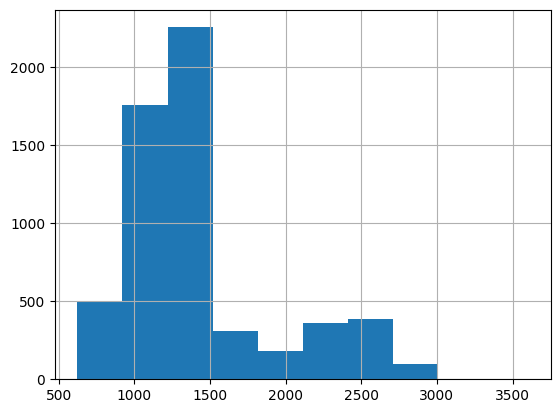

In [104]:
## Видим, что на графике как будто 2 распределения -- значение ниже и выше 1500
## Попробуем сделать бинарник
df_train['engine'].hist()

In [105]:
df_train['engine_bin'] = df_train['engine'].apply(lambda x: 1 if x < 1500 else 0)

### Принципиально новые признаки

In [106]:
df_train_new['3_more_owner'] = df_train_new['owner'].apply(
    lambda x: 1 if x in ['Third Owner', 'Fourth & Above Owner'] else 0
    )
df_test_new['3_more_owner'] = df_test_new['owner'].apply(
    lambda x: 1 if x in ['Third Owner', 'Fourth & Above Owner'] else 0
    )

### Доработка признаков

In [107]:
## Подправим выбросы!

def get_valid_interval(x):
    x_25 = np.quantile(df_train['engine'], 0.25)
    x_75 = np.quantile(df_train['engine'], 0.75)
    inter = 3 * (x_75 - x_25)

    low_bound, high_bound = x_25 - inter, x_75 + inter
    return low_bound, high_bound

def change_outs(x):
    low_bound, high_bound = get_valid_interval(x)
    if x < low_bound:
        return low_bound
    elif x > high_bound:
        return high_bound
    return x

In [108]:
for col in num_cols:
    if col != 'selling_price':
        df_train_new[col + '_'] = df_train_new[col].apply(lambda x: change_outs(x))
        df_test_new[col + '_'] = df_test_new[col].apply(lambda x: change_outs(x))

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [109]:
def business_metrics(y_true, y_pred):
    ratio = y_pred/y_true
    outs = ratio.values[(ratio.values > 1.1)|(ratio.values < 0.9)]
    return outs.shape[0] / y_true.shape[0]

In [110]:
df_num_train = df_train[num_cols + ['seats']].copy()
df_num_test = df_test[num_cols + ['seats']].copy()

y_train = df_num_train['selling_price']
X_train = df_num_train.drop(columns=['selling_price'])
y_test = df_num_test['selling_price']
X_test = df_num_test.drop(columns=['selling_price'])

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

bus_metric_train = business_metrics(y_train, model.predict(X_train))
bus_metric_test = business_metrics(y_test, model.predict(X_test))

In [112]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.786986301369863
Бизнес-метрика на тесте: 0.769


In [113]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

bus_metric_train = business_metrics(y_train, model.predict(X_train))
bus_metric_test = business_metrics(y_test, model.predict(X_test))

In [115]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.786986301369863
Бизнес-метрика на тесте: 0.769


In [116]:
model = Lasso()
model.fit(X_train, y_train)

bus_metric_train = business_metrics(y_train, model.predict(X_train))
bus_metric_test = business_metrics(y_test, model.predict(X_test))

In [117]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.786986301369863
Бизнес-метрика на тесте: 0.769


In [118]:
model = Ridge(**model_grid.best_params_)
model.fit(X_train_cat, y_train)

bus_metric_train = business_metrics(y_train, model.predict(X_train_cat))
bus_metric_test = business_metrics(y_test, model.predict(X_test_cat))

In [119]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.7279109589041096
Бизнес-метрика на тесте: 0.703


`Answer`: лучше всего последняя модель с кат фичами

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [120]:
## Посчитаем долю значений с перепрогнозом и недопрогнозом,
## но также зададим веса -- пусть у перепрогноза будет вес 0.5

def your_business_metrics(y_true, y_pred, w=0.2):
    ratio = y_pred/y_true
    over_outs = ratio.values[ratio.values > 1.1].shape[0]
    under_outs = ratio.values[ratio.values < 0.9].shape[0]
    outs = w * over_outs + (1 - w) * under_outs

    return outs / y_true.shape[0]

In [121]:
df_num_train = df_train[num_cols + ['seats']].copy()
df_num_test = df_test[num_cols + ['seats']].copy()

y_train = df_num_train['selling_price']
X_train = df_num_train.drop(columns=['selling_price'])
y_test = df_num_test['selling_price']
X_test = df_num_test.drop(columns=['selling_price'])

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

bus_metric_train = your_business_metrics(y_train, model.predict(X_train))
bus_metric_test = your_business_metrics(y_test, model.predict(X_test))

In [123]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.3696575342465754
Бизнес-метрика на тесте: 0.3698


In [124]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

bus_metric_train = your_business_metrics(y_train, model.predict(X_train))
bus_metric_test = your_business_metrics(y_test, model.predict(X_test))

In [126]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.3696575342465754
Бизнес-метрика на тесте: 0.3698


In [127]:
model = Lasso()
model.fit(X_train, y_train)

bus_metric_train = your_business_metrics(y_train, model.predict(X_train))
bus_metric_test = your_business_metrics(y_test, model.predict(X_test))

In [128]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.3696575342465754
Бизнес-метрика на тесте: 0.3698


In [129]:
model = Ridge(**model_grid.best_params_)
model.fit(X_train_cat, y_train)

bus_metric_train = your_business_metrics(y_train, model.predict(X_train_cat))
bus_metric_test = your_business_metrics(y_test, model.predict(X_test_cat))

In [130]:
print(f'Бизнес-метрика на трейне: {bus_metric_train}')
print(f'Бизнес-метрика на тесте: {bus_metric_test}')

Бизнес-метрика на трейне: 0.3397602739726027
Бизнес-метрика на тесте: 0.33740000000000003


`Answer`: лучше всего последняя модель с кат фичами

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [131]:
pip install fastapi -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.2 MB/s eta 0:00:00


In [138]:
import pickle

In [153]:
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

In [156]:
ohe_filename = 'ohe_cat.pkl'
with open(ohe_filename, 'wb') as model_file:
    pickle.dump(ohe, model_file)

In [170]:
scaler_filename = 'scaler_num.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scal, scaler_file)

In [148]:
from fastapi import FastAPI
from fastapi import File, UploadFile
from fastapi.responses import StreamingResponse
from pydantic import BaseModel
from typing import List
import pandas as pd
import numpy as np
import re
import io
import pickle
import uvicorn
import json

app = FastAPI()

num_cols = ['year', 'km_driven', 'mileage',
'engine', 'max_power', 'torque', 'max_torque_rpm']

ohe_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']

fillna_dict = {'year': 2014.0, 'km_driven': 70000.0, 'mileage': 19.369999999999997,
'engine': 1248.0, 'max_power': 81.86, 'torque': 150.0, 'max_torque_rpm': 150.0}

# all_cols = ['Diesel', 'LPG', 'Petrol', 'Individual', 'Trustmark Dealer', 'Manual', 'Fourth & Above Owner',
# 'Second Owner', 'Test Drive Car', 'Third Owner', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat',
# 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
# 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota',
# 'Volkswagen', 'Volvo']

with open("best_model.pkl", 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open("ohe_cat.pkl", 'rb') as ohe_file:
    loaded_ohe = pickle.load(ohe_file)

# with open("scaler_num.pkl", 'rb') as scaler_file:
#     loaded_scaler = pickle.load(scaler_file)

class Item(BaseModel):
    name: str
    year: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: float
    engine: float
    max_power: float
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> dict:

    item = item.model_dump()
    data = pd.DataFrame(item.values(), index=item.keys()).T
    data['engine'] = data['engine'].dropna().astype(int)
    data['seats'] = data['seats'].dropna().astype(int)
    data['seats'] = data['seats'].fillna(np.median(data['seats']))

    data['mileage'] = pd.to_numeric(data['mileage'].apply(
        lambda x: x.split()[0] if isinstance(x, str) else x
        ))
    data['engine'] = pd.to_numeric(data['engine'].apply(
        lambda x: x.split()[0] if isinstance(x, str) else x
        ))
    data['max_power'] = pd.to_numeric(data['max_power'].apply(
        lambda x: np.nan if x == ' bhp' else x.split()[0] if isinstance(x, str) else x
        ))
    data['torque'] = data['torque'].apply(
        lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[0])\
        if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
        )
    data['max_torque_rpm'] = data['torque'].apply(
        lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[-1])\
        if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
        )

    data = data.fillna(fillna_dict)
    data['brand'] = data['name'].apply(lambda x: x.split()[0])
    data = data[num_cols+ohe_cols+['seats']]
    # data[num_cols+['seats']] = loaded_scaler.transform(data[num_cols+['seats']])

    ohe_cols_data = loaded_ohe.transform(data[ohe_cols]).toarray()
    ohe_col_names = loaded_ohe.categories_
    all_cols = []
    [all_cols.extend(cols[1:]) for cols in ohe_col_names]
    ohe_cols_data = pd.DataFrame(ohe_cols_data, columns=all_cols)
    data = pd.concat([
        data.drop(columns=ohe_cols).reset_index(),
        ohe_cols_data.reset_index()
    ], axis=1).drop(columns=['index'])
    res = loaded_model.predict(data[list(loaded_model.feature_names_in_)])
    return {'prediction': res.tolist()}

@app.post("/predict_items")
def predict_items(items: UploadFile = File(...)) -> StreamingResponse:

    data = pd.read_csv(items.file, index_col=0)
    data['engine'] = data['engine'].dropna().astype(int)
    data['seats'] = data['seats'].dropna().astype(int)
    data['seats'] = data['seats'].fillna(np.median(data['seats']))

    data['mileage'] = pd.to_numeric(data['mileage'].apply(
        lambda x: x.split()[0] if isinstance(x, str) else x
        ))
    data['engine'] = pd.to_numeric(data['engine'].apply(
        lambda x: x.split()[0] if isinstance(x, str) else x
        ))
    data['max_power'] = pd.to_numeric(data['max_power'].apply(
        lambda x: np.nan if x == ' bhp' else x.split()[0] if isinstance(x, str) else x
        ))
    data['torque'] = data['torque'].apply(
        lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[0])\
        if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
        )
    data['max_torque_rpm'] = data['torque'].apply(
        lambda x: float(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))[-1])\
        if len(re.findall(r"\d+[\.,]?\d+", str(x).replace(',', '.'))) != 0 else np.nan
        )

    data = data.fillna(fillna_dict)
    data['brand'] = data['name'].apply(lambda x: x.split()[0])
    data = data[num_cols+ohe_cols+['seats']]
    # data[num_cols+['seats']] = loaded_scaler.transform(data[num_cols+['seats']])

    ohe_cols_data = loaded_ohe.transform(data[ohe_cols]).toarray()
    ohe_col_names = loaded_ohe.categories_
    all_cols = []
    [all_cols.extend(cols[1:]) for cols in ohe_col_names]
    ohe_cols_data = pd.DataFrame(ohe_cols_data, columns=all_cols)
    data = pd.concat([
        data.drop(columns=ohe_cols).reset_index(),
        ohe_cols_data.reset_index()
    ], axis=1).drop(columns=['index'])

    stream = io.StringIO()
    data['preds'] = loaded_model.predict(data[list(loaded_model.feature_names_in_)])
    data.to_csv(stream, index=False)
    response = StreamingResponse(iter([stream.getvalue()]),
                                 media_type="text/csv"
                                 )

    response.headers["Content-Disposition"] = "attachment; filename=result.csv"
    return response

if __name__ == '__main__':
    uvicorn.run('predictor:app', port=8000, reload=True) #host='127.0.0.1',

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>